Notebook #4

# Nuclear Weapons (issue codes = NU)



**Link:** https://ourworldindata.org/nuclear-weapons 

**Data Title:** NUCLEAR WEAPONS INVENTORY BY COUNTRY (FAS NUCLEAR NOTEBOOK)

**Author:** Hans M. Kristensen and Robert S. Norris

**Published:** Federation of American Scientists

**Published online:** https://thebulletin.org/nuclear-notebook/ 


## Load Data

In [35]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import math

In [36]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import os
os.getcwd()

'/content'

In [38]:
UN_data_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
# nuclear data 
nuclear_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/input_data/number-of-nuclear-warheads-in-the-inventory-of-the-nuclear-powers.csv', sep=',')

In [40]:
# military data
military_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/input_data/military-expenditure-as-share-of-gdp.csv', sep=',') 

## Nuclear

### Understanding Data

In [ ]:
nuclear_df.head()

,Entity,Code,Year,Nuclear weapons inventory by country (FAS Nuclear Notebook)
0,China,CHN,1945,0
1,China,CHN,1946,0
2,China,CHN,1947,0
3,China,CHN,1948,0
4,China,CHN,1949,0


In [ ]:
len(nuclear_df)

657

In [ ]:
nuclear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 4 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Entity                                                       657 non-null    object
 1   Code                                                         657 non-null    object
 2   Year                                                         657 non-null    int64 
 3   Nuclear weapons inventory by country (FAS Nuclear Notebook)  657 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.7+ KB


In [ ]:
nuclear_df.describe()

,Year,Nuclear weapons inventory by country (FAS Nuclear Notebook)
count,657.000000,657.000000
mean,1981.000000,3118.324201
std,21.087362,7778.915516
min,1945.000000,0.000000
25%,1963.000000,0.000000
50%,1981.000000,63.000000
75%,1999.000000,350.000000
max,2017.000000,40159.000000


In [ ]:
nuclear_df.isnull().sum()

Entity                                                         0
Code                                                           0
Year                                                           0
Nuclear weapons inventory by country (FAS Nuclear Notebook)    0
dtype: int64

In [ ]:
nuclear_df.Code.unique()

array(['CHN', 'FRA', 'IND', 'ISR', 'PRK', 'PAK', 'RUS', 'GBR', 'USA'],
      dtype=object)

### Merge

In [ ]:
len(nuclear_df['Code'].unique())

9

In [ ]:
len(UN_data_df['country'].unique())

198

In [ ]:
nuclear_df.columns

Index(['Entity', 'Code', 'Year',
       'Nuclear weapons inventory by country (FAS Nuclear Notebook)'],
      dtype='object')

In [ ]:
# drop country name column
# we do not need the the 'Entity' column because we will use the 'Code' column for the merge
nuclear_df = nuclear_df.drop('Entity', axis=1)

In [ ]:
# change code to country code
nuclear_df = nuclear_df.rename(columns={'Code':'country', 'Year': 'year', 'Nuclear weapons inventory by country (FAS Nuclear Notebook)': 'nuclear_weapons_inventory'})

In [ ]:
temp = pd.merge(UN_data_df, nuclear_df, on=['country', 'year'], how='left')

### Save

In [ ]:
# save the vote_by_developed into a CSV (Resolution_by_Developed_Voting_Counts)
temp.to_csv(r'/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR_NU.csv', index = False)

# Arms Control (issue codes = DI)


**Link:** https://ourworldindata.org/nuclear-weapons 

**Data Title:** MILITARY EXPENDITURE (% OF GDP)

**Published:** World Development Indicators - World Bank (2021.07.30)

**Published online:** Armaments, Disarmament and International Security - Stockholm International Peace Research Institute


## Load

In [ ]:
UN_data_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR_NU.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# military data
military_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/input_data/military-expenditure-as-share-of-gdp.csv', sep=',') 

## Arms and Military

### Understanding Data

In [ ]:
UN_data_df.head()

,unnamed: 0,rcid,ccode,member,vote,country,countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,continent,gdp_per_capita_(current us$),developed?,median_gdp,human_rights_score,upholds_hr?,nuclear_weapons_inventory
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0,9.0
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0,NaN
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0,NaN
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0,NaN


In [ ]:
UN_data_df.columns

Index(['unnamed: 0', 'rcid', 'ccode', 'member', 'vote', 'country',
       'countryname', 'year', 'session', 'abstain', 'yes', 'no',
       'importantvote', 'date', 'unres', 'amend', 'para', 'short', 'descr',
       'me', 'nu', 'di', 'hr', 'co', 'ec', 'ident', 'resid', 'continent',
       'gdp_per_capita_(current us$)', 'developed?', 'median_gdp',
       'human_rights_score', 'upholds_hr?', 'nuclear_weapons_inventory'],
      dtype='object')

In [ ]:
UN_data_df.isnull().sum()

unnamed: 0                            0
rcid                                  0
ccode                                 0
member                           329201
vote                                  0
country                               0
countryname                           0
year                                  0
session                               0
abstain                            7157
yes                                 190
no                                21383
importantvote                    135957
date                                  0
unres                             31304
amend                            651659
para                             585477
short                            111254
descr                               195
me                                    0
nu                                    0
di                                    0
hr                                    0
co                                    0
ec                                    0


In [ ]:
military_df.head()

,Entity,Code,Year,Military expenditure (% of GDP)
0,Afghanistan,AFG,1970,1.629606
1,Afghanistan,AFG,1973,1.868910
2,Afghanistan,AFG,1974,1.610825
3,Afghanistan,AFG,1975,1.722066
4,Afghanistan,AFG,1976,2.046087


In [ ]:
len(military_df)

9680

In [ ]:
military_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           9680 non-null   object 
 1   Code                             7296 non-null   object 
 2   Year                             9680 non-null   int64  
 3   Military expenditure (% of GDP)  9680 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 302.6+ KB


In [ ]:
military_df.describe()

,Year,Military expenditure (% of GDP)
count,9680.000000,9680.000000
mean,1992.989773,2.790497
std,16.548888,2.929263
min,1960.000000,0.000000
25%,1979.000000,1.351228
50%,1995.000000,2.084591
75%,2007.000000,3.284709
max,2019.000000,117.349823


In [ ]:
military_df.isnull().sum()

Entity                                0
Code                               2384
Year                                  0
Military expenditure (% of GDP)       0
dtype: int64

In [ ]:
for i in military_df['Entity'].unique():
  print(i)

Afghanistan
Africa Eastern and Southern
Africa Western and Central
Albania
Algeria
Angola
Arab World
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Belize
Benin
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Caribbean Small States
Central African Republic
Central Europe and the Baltics
Chad
Chile
China
Colombia
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominican Republic
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD)
East Asia & Pacific (excluding high income)
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD)
Europe & Central Asia (excluding high income)
European Union
Fiji
Finland
Fragile and conflict affected situations
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guine

In [ ]:
# function that checks if a string is NaN
def isNaN(string):
    return string != string

In [ ]:
other = []
for i in range(len(military_df)):
  if (isNaN(military_df.loc[i, 'Code'])):
    other.append(military_df.loc[i, 'Entity'])

In [ ]:
for i in np.unique(other):
  print(i)

Africa Eastern and Southern
Africa Western and Central
Arab World
Caribbean Small States
Central Europe and the Baltics
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD)
East Asia & Pacific (excluding high income)
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD)
Europe & Central Asia (excluding high income)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total
Late-demographic dividend
Latin America & Caribbean
Latin America & Caribbean (IDA & IBRD)
Latin America & Caribbean (excluding high income)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa
Middle East & North Africa (IDA & IBRD)
Middle East & North Africa (excluding high income)
Middle income
North America
OECD members
Other small states
Pacific island small states
Post-demographic dividend
Pre-demogra

### Merge

In [ ]:
len(military_df['Code'].unique())

168

In [ ]:
len(UN_data_df['country'].unique())

198

In [ ]:
military_df.columns

Index(['Entity', 'Code', 'Year', 'Military expenditure (% of GDP)'], dtype='object')

In [ ]:
# drop country name column
# we do not need the the 'Entity' column because we will use the 'Code' column for the merge
military_df = military_df.drop('Entity', axis=1)

In [ ]:
# change code to country code
military_df = military_df.rename(columns={'Code':'country', 'Year': 'year', 'Military expenditure (% of GDP)': 'military_expenditure'})

In [ ]:
#military_df.head()

In [ ]:
temp = pd.merge(UN_data_df, military_df, on=['country', 'year'], how='left')

In [ ]:
temp.isnull().sum()

unnamed: 0                            0
rcid                                  0
ccode                                 0
member                           329201
vote                                  0
country                               0
countryname                           0
year                                  0
session                               0
abstain                            7157
yes                                 190
no                                21383
importantvote                    135957
date                                  0
unres                             31304
amend                            651659
para                             585477
short                            111254
descr                               195
me                                    0
nu                                    0
di                                    0
hr                                    0
co                                    0
ec                                    0


In [ ]:
len(temp) # good 

1235113

### Save

In [ ]:
temp.to_csv(r'/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR_NU_DI.csv', index = False)

### Create Column


####Load

In [7]:
UN_data_df = pd.read_csv('/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR_NU_DI.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
UN_data_df.head()

,unnamed: 0,rcid,ccode,member,vote,country,countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,continent,gdp_per_capita_(current us$),developed?,median_gdp,human_rights_score,upholds_hr?,nuclear_weapons_inventory,military_expenditure
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0,9.0,NaN
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0,NaN,NaN
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0,NaN,NaN
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0,NaN,NaN


####Plot

In [9]:
di_null_count_per_year = {year:UN_data_df[UN_data_df['year']== year]['military_expenditure'].isnull().sum() / UN_data_df['military_expenditure'].isnull().sum() for year in UN_data_df['year'].unique()}

Text(0, 0.5, 'Null Counts')

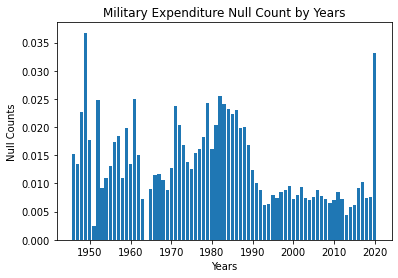

In [10]:
plt.bar(di_null_count_per_year.keys(), di_null_count_per_year.values())
plt.title('Military Expenditure Null Count by Years')
plt.xlabel('Years')
plt.ylabel('Null Counts')

####New column


In [ ]:
'''
1 = top 25%
2 = 26-50%
3 = bottom 50%
'''

'\n1 = top 25%\n2 = 26-50%\n3 = bottom 50%\n'

In [11]:
temp = UN_data_df.copy()

In [12]:
temp['military_expenditure_percentile'] = math.nan

In [13]:
temp.military_expenditure_percentile.isnull().sum()

1235113

In [11]:
temp.head()

,unnamed: 0,rcid,ccode,member,vote,country,countryname,year,session,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,ident,resid,continent,gdp_per_capita_(current us$),developed?,median_gdp,human_rights_score,upholds_hr?,nuclear_weapons_inventory,military_expenditure,military_expenditure_percentile
0,1,3,2,1.0,1,USA,United States of America,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-1.023488,0.0,9.0,NaN,NaN
1,2,3,20,1.0,3,CAN,Canada,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.064829,0.0,NaN,NaN,NaN
2,3,3,31,NaN,9,BHS,Bahamas,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
3,4,3,40,1.0,1,CUB,Cuba,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,-0.306837,0.0,NaN,NaN,NaN
4,5,3,41,1.0,1,HTI,Haiti,1946,1,4.0,29.0,18.0,0.0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,0.0,1001,North America,0.0,0,0.0,0.086377,1.0,NaN,NaN,NaN


In [14]:
temp['military_expenditure'].describe()

count    677525.000000
mean          2.784303
std           3.235597
min           0.000000
25%           1.210229
50%           1.938539
75%           3.225225
max         117.349823
Name: military_expenditure, dtype: float64

In [27]:
temp[temp['year'] == 2015]['military_expenditure'].quantile(1.0)

13.3256723349734

In [22]:
# set 3 = 51 - 100
temp.loc[temp['military_expenditure'] <= temp['military_expenditure'].quantile(1.0), 'military_expenditure_percentile'] = 3

# set 2 = 26 - 50
temp.loc[temp['military_expenditure'] <= temp['military_expenditure'].quantile(0.5), 'military_expenditure_percentile'] = 2

# set 1 - bottom 25? 0 - 25?
temp.loc[temp['military_expenditure'] <= temp['military_expenditure'].quantile(0.25), 'military_expenditure_percentile'] = 1

In [23]:
len(temp[temp['military_expenditure_percentile'] == 3])

338735

In [24]:
len(temp[temp['military_expenditure_percentile'] == 2])

169324

In [25]:
len(temp[temp['military_expenditure_percentile'] == 1])

169466

In [32]:
# per year 
for year in temp.year.unique():
  # set 3 = 51 - 100
  temp.loc[temp['military_expenditure'] <= temp[temp['year'] == year]['military_expenditure'].quantile(1.0), 'military_expenditure_percentile'] = 3

  # set 2 = 26 - 50
  temp.loc[temp['military_expenditure'] <= temp[temp['year'] == year]['military_expenditure'].quantile(0.5), 'military_expenditure_percentile'] = 2

  # set 1 - bottom 25? 0 - 25?
  temp.loc[temp['military_expenditure'] <= temp[temp['year'] == year]['military_expenditure'].quantile(0.25), 'military_expenditure_percentile'] = 1

### Save

In [ ]:
temp.to_csv(r'/content/drive/MyDrive/Senior_Year/Fall_2021/Research/data/output_data/UN_data_with_GDP_Developed_HR_NU_DI.csv', index = False)